In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
import xgboost

sns.set_style("whitegrid")

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
attrition = pd.read_csv('./input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(attrition.head(2))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6        

In [3]:
# Number of NaN in data
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

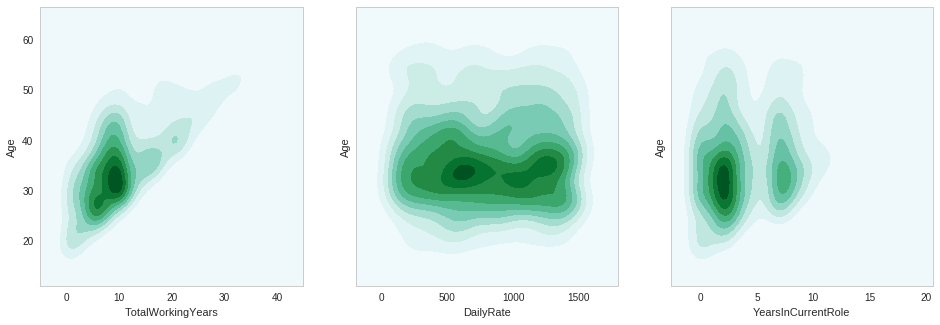

In [4]:
f, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=False, sharey=True)

y = attrition['Age']

for i, feature in enumerate(['TotalWorkingYears', 'DailyRate', 'YearsInCurrentRole']):
    sns.kdeplot(attrition[feature], y, shade=True, ax=axes[i])

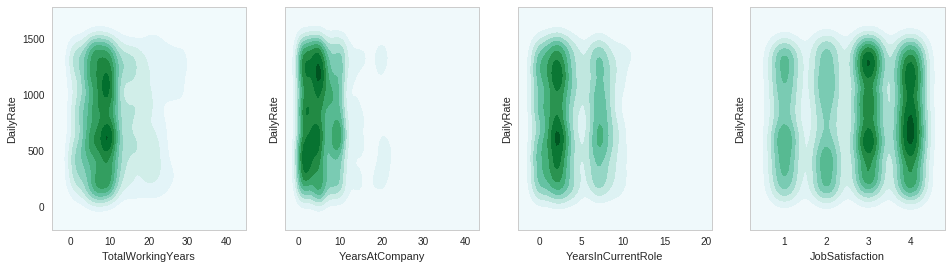

In [5]:
f, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=False, sharey=True)

y = attrition['DailyRate']

for i, feature in enumerate(['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'JobSatisfaction']):
    sns.kdeplot(attrition[feature], y, shade=True, ax=axes[i])

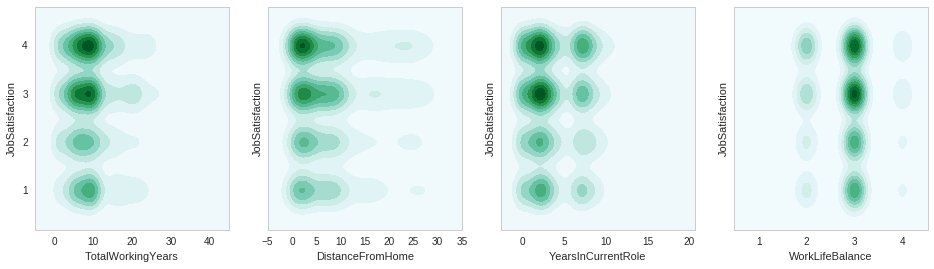

In [6]:
f, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=False, sharey=True)

y = attrition['JobSatisfaction']

for i, feature in enumerate(['TotalWorkingYears', 'DistanceFromHome', 'YearsInCurrentRole', 'WorkLifeBalance']):
    sns.kdeplot(attrition[feature], y, shade=True, ax=axes[i])